# Лабораторная работа № 3
## Обучение нейросетевых моделей классификации изображений
### Боровских Вадим, 932003
####  Построить нейросетевые модели – бинарный классификатор



In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.python.keras.layers import Activation, Dropout, Flatten, Dense

Набор данных изображений больных листьев перца и  здоровых листьев котрофеля.

In [28]:
# Гиперпараметры 
IMG_HEIGHT = IMG_WIDTH = 150
IMG_CHANNEL = 3
EPOCHS = 30
BATCH_SIZE = 16
TRAIN_SAMPLES = 2475
VAL_SAMPLES = 1695 
TEST_SAMPLES = 2045

In [29]:
# Каталог с данными для обучения
train_dir = 'train'
# Каталог с данными для проверки
validation_dir = 'val'
# Каталог с данными для тестирования
test_dir = 'test'

In [30]:
# Генераторы изображений
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_and_val_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
# Обучающая, тестовая и валидационная выборки
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_and_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

test_generator = test_and_val_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

Found 2475 images belonging to 2 classes.
Found 1695 images belonging to 2 classes.
Found 2045 images belonging to 2 classes.


In [32]:
# Модель
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNEL)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Dropout 
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),  # Dropout 
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

Архитектура нейросети:

Слои свертки:
* Первый сверточный слой с 32 фильтрами, функцией активации ReLU и размером ядра 3x3.
* Слой максимальной пулинга (MaxPooling) с размером окна 2x2.
* Слой Dropout с коэффициентом 0.2.
* Второй сверточный слой с 64 фильтрами, функцией активации ReLU и размером ядра 3x3.
* Слой максимальной пулинга (MaxPooling) с размером окна 2x2.
* Третий сверточный слой с 128 фильтрами, функцией активации ReLU и размером ядра 3x3.
* Слой максимальной пулинга (MaxPooling) с размером окна 2x2.
* Четвертый сверточный слой с 128 фильтрами, функцией активации ReLU и размером ядра 3x3.
* Слой максимальной пулинга (MaxPooling) с размером окна 2x2.
* Слой Dropout с коэффициентом 0.2.

Полносвязные слои:

* Слой вытягивания (Flatten) для преобразования выходных данных сверточных слоев в одномерный вектор.
* Полносвязный слой с 512 нейронами и функцией активации ReLU.
* Выходной полносвязный слой с 1 нейроном и функцией активации sigmoid (для бинарной классификации).

In [33]:
# Компиляция
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['acc'])

In [34]:
# Обучение
history = model.fit(
    train_generator,
    steps_per_epoch=TRAIN_SAMPLES // BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=VAL_SAMPLES // BATCH_SIZE)

Epoch 1/30
154/154 [==============================] - 143s 908ms/step - loss: 0.6843 - acc: 0.6287 - val_loss: 0.6670 - val_acc: 0.5619
Epoch 2/30
154/154 [==============================] - 139s 902ms/step - loss: 0.3994 - acc: 0.8573 - val_loss: 0.2345 - val_acc: 0.9238
Epoch 3/30
154/154 [==============================] - 138s 897ms/step - loss: 0.2657 - acc: 0.9170 - val_loss: 0.1891 - val_acc: 0.9804
Epoch 4/30
154/154 [==============================] - 139s 901ms/step - loss: 0.1785 - acc: 0.9516 - val_loss: 0.1439 - val_acc: 0.9690
Epoch 5/30
154/154 [==============================] - 139s 899ms/step - loss: 0.1629 - acc: 0.9658 - val_loss: 0.0404 - val_acc: 0.9940
Epoch 6/30
154/154 [==============================] - 139s 901ms/step - loss: 0.0930 - acc: 0.9764 - val_loss: 0.0356 - val_acc: 0.9946
Epoch 7/30
154/154 [==============================] - 138s 898ms/step - loss: 0.0813 - acc: 0.9780 - val_loss: 0.0759 - val_acc: 0.9827
Epoch 8/30
154/154 [============================

In [35]:
# Оценка модели на тестировании
score = model.evaluate(test_generator, steps=TEST_SAMPLES // BATCH_SIZE)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

127/127 [==============================] - 36s 280ms/step - loss: 0.1076 - acc: 0.9719
Test loss: 0.10762838274240494
Test accuracy: 0.9719488024711609


Результаты обучения:
* Потери (loss): 0.1076
* Точность (accuracy): 0.9719

 Значение потерь (loss) составляет 0.1076, что свидетельствует о том, что модель хорошо обобщает данные и имеет небольшие ошибки в предсказаниях.
 
 Точность (accuracy) модели на валидационной выборке составляет 0.9719, что означает, что модель правильно классифицирует объекты с точностью более 97%, что является высоким показателем.
 
 Выводы:Данные результаты свидетельствуют о том, что модель успешно обучена и продемонстрировала высокую точность как на валидационной, так и на тестовой выборках.

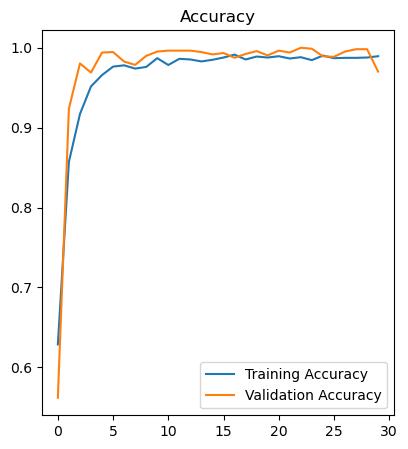

In [37]:
# Создаем график точности
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

Вывод:
На протяжении всего процесса обучения, точность (accuracy) как на обучающей, так и на валидационной выборке улучшается, что свидетельствует о том, что модель успешно учится и демонстрирует хорошие предсказательные способности. Хотя в конце она незначительно падает, результат остается высоким ~0.9-1.

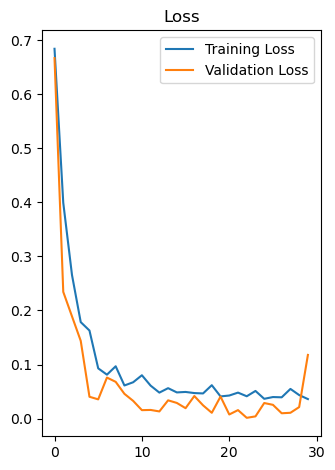

In [38]:
# Создаем график потерь
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()

По мере увеличения количества эпох обучения, значения функции потерь (loss) как на обучающей выборке, так и на валидационной выборке уменьшаются с увеличением точности (accuracy). Это указывает на то, что модель успешно обучается и постепенно улучшает свои предсказательные способности.

In [47]:
# Сохранение модели
model.save('model.h5')

In [48]:
# Загрузка модели
from tensorflow.keras.models import load_model
model = load_model('model.h5')

# Обучающая, тестовая и валидационная выборки
train_generator = train_datagen.flow_from_directory(
    'new_train_dir', # Новый каталог с данными для обучения
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

validation_generator = test_and_val_datagen.flow_from_directory(
    'new_validation_dir', # Новый каталог с данными для проверки
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

test_generator = test_and_val_datagen.flow_from_directory(
    'new_test_dir', # Новый каталог с данными для тестирования
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary')

NEW_TRAIN_SAMPLES = 2475
NEW_VAL_SAMPLES = 2255
NEW_TEST_SAMPLES = 2255

Found 2475 images belonging to 2 classes.
Found 2255 images belonging to 2 classes.
Found 2255 images belonging to 2 classes.


In [49]:
# Повторное обучение
history = model.fit(
    train_generator,
    steps_per_epoch=NEW_TRAIN_SAMPLES // BATCH_SIZE, # Новое количество обучающих образцов
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=NEW_VAL_SAMPLES // BATCH_SIZE) # Новое количество образцов для валидации

Epoch 1/30
154/154 [==============================] - 230s 1s/step - loss: 0.0378 - acc: 0.9874 - val_loss: 0.0110 - val_acc: 0.9951
Epoch 2/30
154/154 [==============================] - 162s 1s/step - loss: 0.0281 - acc: 0.9911 - val_loss: 0.6909 - val_acc: 0.7982
Epoch 3/30
154/154 [==============================] - 162s 1s/step - loss: 0.0371 - acc: 0.9878 - val_loss: 0.0348 - val_acc: 0.9893
Epoch 4/30
154/154 [==============================] - 161s 1s/step - loss: 0.0470 - acc: 0.9870 - val_loss: 0.0522 - val_acc: 0.9857
Epoch 5/30
154/154 [==============================] - 164s 1s/step - loss: 0.0329 - acc: 0.9931 - val_loss: 0.0070 - val_acc: 0.9969
Epoch 6/30
154/154 [==============================] - 154s 1s/step - loss: 0.0388 - acc: 0.9919 - val_loss: 0.0018 - val_acc: 0.9996
Epoch 7/30
154/154 [==============================] - 145s 942ms/step - loss: 0.0415 - acc: 0.9870 - val_loss: 0.0055 - val_acc: 0.9982
Epoch 8/30
154/154 [==============================] - 145s 938ms/s

In [50]:
# Оценка модели на новом тестовом наборе
score = model.evaluate(test_generator, steps=NEW_TEST_SAMPLES // BATCH_SIZE) # Новое количество тестовых образцов
print('Test loss:', score[0])
print('Test accuracy:', score[1])

140/140 [==============================] - 44s 316ms/step - loss: 5.2238e-04 - acc: 1.0000
Test loss: 0.000522375397849828
Test accuracy: 1.0


Вывод:
После повторного обучения модель продемонстрировала не только сохранение своей предыдущей высокой точности, но и показала улучшение в своей способности к обобщению на новые данные.

Text(0.5, 1.0, 'Training and Validation Accuracy')

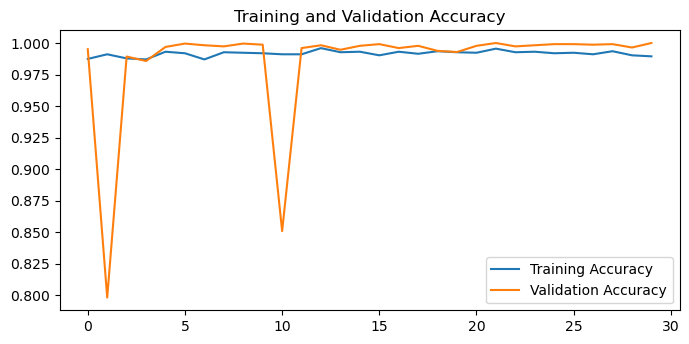

In [51]:
# Создаем график точности
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(history.history['acc'], label='Training Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

Выводы:
* Точность (accuracy) модели на новом тестовом наборе составляет 1.0, что означает, что модель классифицирует объекты с точностью 100%. Это является отличным показателем и свидетельствует о высокой предсказательной способности модели на новых данных.


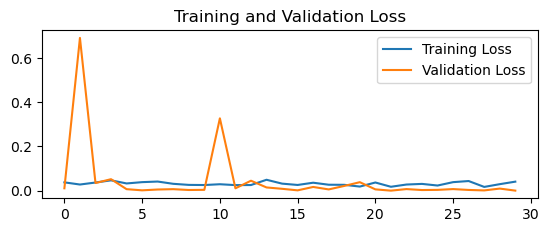

In [52]:
# Создаем график потерь
plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Выводы:
* Значение потерь (loss) на новом тестовом наборе составляет 0.00052, что является очень низким значением. Это свидетельствует о том, что модель продолжает хорошо обобщать данные и имеет минимальные ошибки в предсказаниях на новых данных.


In [53]:
# Сохранение модели после повторного обучения
model.save('model_retrained.h5')

### Вывод:
В данной работе была построена модель бинарного классификатора, а также было проведено повторное обучение на новом наборе. Результаты обучения примерно одинаковы, поэтому было решено сохранить обе модели